### Questions to Investigate: In this part of the analysis the network will be analysed

### 3) What is the busiest route during the peak hours ?



In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import transforms, pyplot as plt
import networkx as nx
%matplotlib inline
#%matplotlib

In [2]:
%store -r df
%store -r df_time
%store -r df_customer
%store -r df_subscriber

In [3]:
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [4]:
df.shape

(1001173, 26)

In [5]:
df['start_end'] = df[['start_station_id','end_station_id']].apply(tuple, axis=1)

In [6]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance,start_end
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,2017,12,16,15,1335.166667,Weekend,30,Winter,0.944876,"(74, 43)"
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,2017,12,15,13,1313.333333,Weekend,52,Winter,3.071144,"(284, 96)"
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,2017,12,14,2,726.716667,Weekend,20,Winter,0.637772,"(239, 247)"
28,871,2017-12-31 23:37:47.192,2017-12-31 23:52:18.473,323,Broadway at Kearny,37.798014,-122.405950,14,Clay St at Battery St,37.795001,...,2017,12,23,23,14.516667,Weekend,38,Winter,0.623898,"(323, 14)"
32,733,2017-12-31 23:38:38.861,2017-12-31 23:50:52.504,323,Broadway at Kearny,37.798014,-122.405950,14,Clay St at Battery St,37.795001,...,2017,12,23,23,12.216667,Weekend,37,Winter,0.623898,"(323, 14)"


In [13]:
df_top10_end = df['end_station_name'].value_counts().head(10)
df_top10_end= df_top10_end.rename_axis('end_station_name').reset_index(name='number')
df_top10_end 

,end_station_name,number
0,San Francisco Caltrain (Townsend St at 4th St),32757
1,San Francisco Caltrain Station 2 (Townsend St...,27702
2,San Francisco Ferry Building (Harry Bridges Pl...,26770
3,Montgomery St BART Station (Market St at 2nd St),24764
4,Berry St at 4th St,20922
5,Market St at 10th St,20809
6,The Embarcadero at Sansome St,20394
7,Powell St BART Station (Market St at 4th St),18868
8,Steuart St at Market St,16805
9,Powell St BART Station (Market St at 5th St),14987


In [14]:
sns.set_style("whitegrid", {'axes.grid' : False})
ax = plt.figure(figsize = [6, 8])
data = df_top10_end    # data underlying bar plot in question
pal = sns.color_palette("Blues", len(data))
rank = df_top10_end.index   
sns.barplot(x=df_top10_start['number'], y=df_top10_start['start_station_name'], data=df_top10_start, palette=np.array(pal[::-1])[rank])
plt.ylabel("")
plt.xlabel("\nNumber", fontsize=15)
plt.yticks(fontsize=15)
sns.despine(bottom=True, left=True)
plt.text(-10e3, -1,'Fig: Number of journeys made from the 10 most popular starting stations' , fontsize=20, color=GRAY7, linespacing=1.4)

for i, v in enumerate(df_top10_start['number']):
    plt.text(v + 3, i + .25, str(v), color=GRAY3, fontsize = 15, fontweight='bold')

plt.show()

NameError: name 'df_top10_start' is not defined

<Figure size 432x576 with 0 Axes>

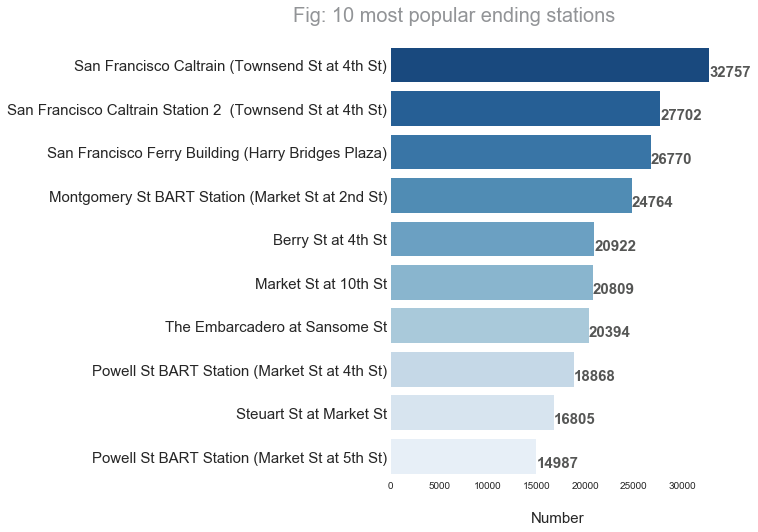

In [15]:
sns.set_style("whitegrid", {'axes.grid' : False})
ax = plt.figure(figsize = [6, 8])
data = df_top10_end    # data underlying bar plot in question
pal = sns.color_palette("Blues", len(data))
rank = df_top10_end.index   
sns.barplot(x=df_top10_end['number'], y=df_top10_end['end_station_name'], data=df_top10_end, palette=np.array(pal[::-1])[rank])
plt.ylabel("")
plt.xlabel("")
plt.yticks(fontsize=15)
sns.despine(bottom=True, left=True)
plt.xlabel("\nNumber", fontsize=15)
plt.text(-10e3, -1,'Fig: 10 most popular ending stations' , fontsize=20, color=GRAY7, linespacing=1.4)

for i, v in enumerate(df_top10_end['number']):
    plt.text(v, i + .25, str(v), color=GRAY3, fontsize = 15, fontweight='bold')

plt.show()

**Ref:https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

In [25]:
combination = df.groupby(['start_station_id', 'end_station_id']).size()
combination = combination.reset_index(name='count')
top_100 = combination.nlargest(20,'count')
top_100

,start_station_id,end_station_id,count
1308,15,6,4378
390,6,16,3354
8247,81,15,3295
1369,15,81,2704
17045,182,196,2650
389,6,15,2387
18086,196,182,2353
1433,16,6,2282
17993,195,182,2260
5793,58,67,2223
